Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
import re
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score
import plotly.express as px
import plotly.graph_objs as go
import torch
import random

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/NLPSharedTask/SemEval2024-task8/subtaskA')
os.chdir('/content/drive/MyDrive/NLPSharedTask/SubtaskA/')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [ ]:
import json
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
!pip install xgboost

Importing train and test dataset

In [ ]:
random_seed = 42

In [ ]:
import json

data = []

with open('subtaskA_train_monolingual.jsonl', 'r') as file:
    for line in file:
        # Parse each line as a separate JSON object
        json_object = json.loads(line)
        data.append(json_object)

# Now, 'data' is a list of dictionaries, each representing a JSON object


In [ ]:
train_df=pd.DataFrame(data)

In [ ]:
train_df.head()

,text,label,model,source,id
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4


In [ ]:
train_df['label'].value_counts()

0    63351
1    56406
Name: label, dtype: int64

In [ ]:
train_df['model'].value_counts()

human      63351
davinci    14343
chatGPT    14339
dolly      14046
cohere     13678
Name: model, dtype: int64

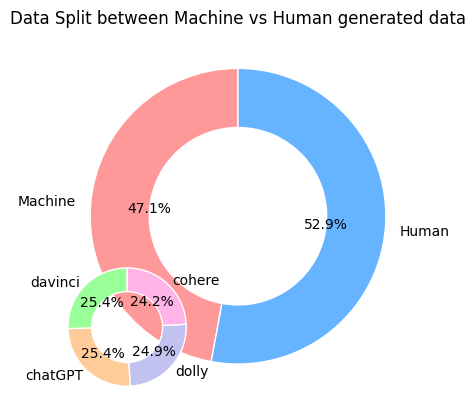

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Machine', 'Human', 'davinci', 'chatGPT', 'dolly', 'cohere']
sizes = [56406, 63351, 14343, 14339, 14046, 13678]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Plot
fig, ax = plt.subplots()

# Main pie chart for 0 and 1
wedges, texts, autotexts = ax.pie(sizes[:2], labels=labels[:2], autopct='%1.1f%%', startangle=90, colors=colors[:2],
                                  wedgeprops=dict(width=0.4, edgecolor='w'))

# Make the center circle
center_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Inner pie chart for subcategories of 0
ax_inner = plt.gca().inset_axes([0, 0, 0.4, 0.4])
ax_inner.pie(sizes[2:], labels=labels[2:], autopct='%1.1f%%', startangle=90, colors=colors[2:],
              wedgeprops=dict(width=0.4, edgecolor='w'))

ax_inner.set(aspect="equal")

plt.title('Data Split between Machine vs Human generated data')
plt.show()


In [ ]:
train_df['label'].value_counts()

0    63351
1    56406
Name: label, dtype: int64

In [ ]:
train_df['text'] = train_df['text'].str.lower()

In [ ]:
test_data = []

with open('subtaskA_dev_monolingual.jsonl', 'r') as file:
    for line in file:
        # Parse each line as a separate JSON object
        json_object = json.loads(line)
        test_data.append(json_object)

In [ ]:
test_df=pd.DataFrame(test_data)
test_df.head()

,text,label,model,source,id
0,Giving gifts should always be enjoyable. Howe...,1,bloomz,wikihow,0
1,Yveltal (Japanese: ユベルタル) is one of the main a...,1,bloomz,wikihow,1
2,If you'd rather not annoy others by being rude...,1,bloomz,wikihow,2
3,If you're interested in visiting gravesite(s) ...,1,bloomz,wikihow,3
4,The following are some tips for becoming succe...,1,bloomz,wikihow,4


In [ ]:
test_df['text'] = test_df['text'].str.lower()

Data Split into Train and Dev

In [ ]:
# Creating X data and y labels
X = train_df['text']
y = train_df['label']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
X_test = test_df['text']
y_test = test_df['label']

In [ ]:
# Applying TFIDF feature extraction on X
vectorizer = TfidfVectorizer(stop_words="english")
X_train = vectorizer.fit_transform(X_train)

X_val = vectorizer.transform(X_val)


In [ ]:
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(107781, 413480) (107781,)
(11976, 413480) (11976,)
(5000, 413480) (5000,)


Linear SVM

In [ ]:
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [ ]:
print("SVC - Train AUC-ROC: ", roc_auc_score(y_train, model.predict(X_train)))
print("SVC - Val AUC-ROC: ", roc_auc_score(y_val, model.predict(X_val)))

SVC - Train AUC-ROC:  0.9728181621457125
SVC - Val AUC-ROC:  0.9008269151819968


In [ ]:
y_pred_svc = model.predict(X_test)
print("SVC - Test AUC-ROC: ", roc_auc_score(y_test, y_pred_svc))
svc_1=f1_score(y_test, y_pred_svc, pos_label=1)
svc_0=f1_score(y_test, y_pred_svc, pos_label=0)

SVC - Test AUC-ROC:  0.6622000000000001


In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71      2500
           1       0.75      0.49      0.59      2500

    accuracy                           0.66      5000
   macro avg       0.68      0.66      0.65      5000
weighted avg       0.68      0.66      0.65      5000



In [ ]:
model_name=[]
f1_0=[]
f1_1=[]

model_name.append('SVC')
f1_0.append(svc_0)
f1_1.append(svc_1)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("Random Forest - Train AUC-ROC: ", roc_auc_score(y_train, rf_classifier.predict(X_train)))
print("Random Forest - Val AUC-ROC: ", roc_auc_score(y_val, rf_classifier.predict(X_val)))

Random Forest - Train AUC-ROC:  1.0
Random Forest - Val AUC-ROC:  0.8656671967620061


In [ ]:
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest - Test AUC-ROC: ", roc_auc_score(y_test, y_pred_rf))
rf_1=f1_score(y_test, y_pred_rf, pos_label=1)
rf_0=f1_score(y_test, y_pred_rf, pos_label=0)

Random Forest - Test AUC-ROC:  0.7126000000000001


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74      2500
           1       0.78      0.59      0.67      2500

    accuracy                           0.71      5000
   macro avg       0.73      0.71      0.71      5000
weighted avg       0.73      0.71      0.71      5000



In [ ]:
model_name.append('Random Forest')
f1_0.append(rf_0)
f1_1.append(rf_1)

In [ ]:
base_classifier = DecisionTreeClassifier(max_depth=1)

adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
print("AdaBoost with Decision Tree - Train AUC-ROC: ", roc_auc_score(y_train, adaboost_classifier.predict(X_train)))
print("AdaBoost with Decision Tree - Val AUC-ROC: ", roc_auc_score(y_val, adaboost_classifier.predict(X_val)))

AdaBoost with Decision Tree - Train AUC-ROC:  0.798168036330287
AdaBoost with Decision Tree - Val AUC-ROC:  0.7998861345705983


In [ ]:
y_pred_ab = adaboost_classifier.predict(X_test)
print("AdaBoost with Decision Tree - Test AUC-ROC: ", roc_auc_score(y_test, y_pred_ab))
ab_1=f1_score(y_test, y_pred_ab, pos_label=1)
ab_0=f1_score(y_test, y_pred_ab, pos_label=0)

AdaBoost with Decision Tree - Test AUC-ROC:  0.6446


In [ ]:
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.61      0.78      0.69      2500
           1       0.70      0.51      0.59      2500

    accuracy                           0.64      5000
   macro avg       0.66      0.64      0.64      5000
weighted avg       0.66      0.64      0.64      5000



In [ ]:
model_name.append('Ada Boost')
f1_0.append(ab_0)
f1_1.append(ab_1)

XGBoost Classifier

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("XGBoost - Train AUC-ROC: ", roc_auc_score(y_train, xgb_classifier.predict(X_train)))
print("XGBoost - Val AUC-ROC: ", roc_auc_score(y_val, xgb_classifier.predict(X_val)))

XGBoost - Train AUC-ROC:  0.9153022452476268
XGBoost - Val AUC-ROC:  0.8801405467860973


In [ ]:
y_pred_xg = xgb_classifier.predict(X_test)
print("XGBoost - Test AUC-ROC: ", roc_auc_score(y_test, y_pred_xg))
xg_1=f1_score(y_test, y_pred_xg, pos_label=1)
xg_0=f1_score(y_test, y_pred_xg, pos_label=0)

XGBoost - Test AUC-ROC:  0.6872


In [ ]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      2500
           1       0.77      0.53      0.63      2500

    accuracy                           0.69      5000
   macro avg       0.71      0.69      0.68      5000
weighted avg       0.71      0.69      0.68      5000



In [ ]:
model_name.append('XGBoost')
f1_0.append(xg_0)
f1_1.append(xg_1)

Naive Bayes Classifier - with Additional Features

In [ ]:
train_df['text_length'] = train_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

train_df['avg_word_length'] = train_df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)
test_df['avg_word_length'] = test_df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)

train_data=train_df
test_data=test_df

tfidf_vectorizer = TfidfVectorizer(max_features=10000,stop_words='english')
X_train_text = tfidf_vectorizer.fit_transform(train_data['text'])
X_test_text = tfidf_vectorizer.transform(test_data['text'])

additional_features = ['text_length', 'avg_word_length','label']
train_data.columns = train_data.columns.astype(str)
test_data.columns = test_data.columns.astype(str)
X_train = pd.concat([pd.DataFrame(X_train_text.toarray()), train_data[additional_features]], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_text.toarray()), test_data[additional_features]], axis=1)

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_train=X_train.fillna(0)
X_test=X_test.fillna(0)

In [ ]:
y_train = X_train['label']
y_test = X_test['label']
X_train = X_train.drop('label', axis=1)
X_test = X_test.drop('label', axis=1)

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train , y_train)

MultinomialNB()

In [ ]:
y_pred_NB = NB_classifier.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_pred_NB))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.40      0.57      2500
           1       0.62      0.99      0.76      2500

    accuracy                           0.69      5000
   macro avg       0.80      0.69      0.67      5000
weighted avg       0.80      0.69      0.67      5000



In [ ]:
nb_1=f1_score(y_test, y_pred_NB, pos_label=1)
nb_0=f1_score(y_test, y_pred_NB, pos_label=0)

In [ ]:
model_name.append('Naive Bayes')
#f1_0.append(0.5662411347517731)
#f1_1.append(0.7638610038610038)

f1_0.append(nb_0)
f1_1.append(nb_1)

In [ ]:
model_name.append('Roberta Base')
f1_0.append(0.8561946902654867)
f1_1.append(0.8295454545454547)

In [ ]:
model_name.append('Roberta Large')
f1_0.append(0.8825490922563913)
f1_1.append(0.8622338113863538)

In [ ]:
df_pred = pd.DataFrame({
    'Model_Name': model_name,
    'Machine': f1_1,
    'Human': f1_0
})

In [ ]:
df_pred

,Model_Name,Machine,Human
0,SVC,0.590347,0.712608
1,Random Forest,0.671393,0.744624
2,Ada Boost,0.590270,0.686209
3,XGBoost,0.629384,0.729412
4,Naive Bayes,0.763861,0.566241
5,Roberta Base,0.829545,0.856195
6,Roberta Large,0.862234,0.882549


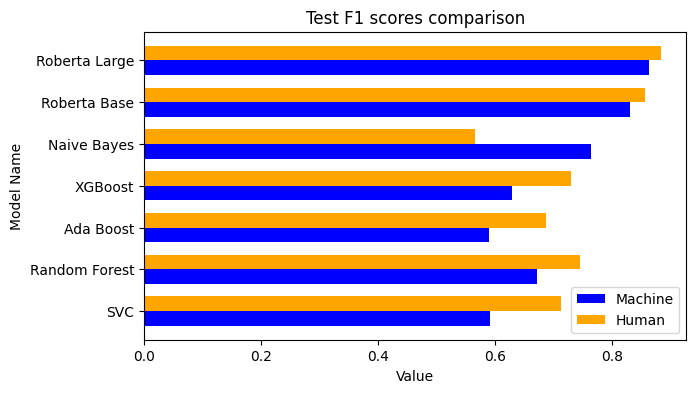

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
bar_height = 0.35
index = np.arange(len(df_pred['Model_Name']))

bar1 = ax.barh(index, df_pred['Machine'], bar_height, label='Machine', color='blue')
bar2 = ax.barh(index + bar_height, df_pred['Human'], bar_height, label='Human', color='orange')

ax.set_ylabel('Model Name')
ax.set_xlabel('Value')
ax.set_title('Test F1 scores comparison')
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(df_pred['Model_Name'])
ax.legend()

plt.show()

Results in Final Format

In [ ]:
!pip3 install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
import evaluate

metric = evaluate.load("bstrai/classification_report")
results_svc = metric.compute(predictions=y_pred_svc, references=y_test)
results_svc

{'0': {'precision': 0.6200769914124963,
  'recall': 0.8376,
  'f1-score': 0.712608473711077,
  'support': 2500},
 '1': {'precision': 0.7498459642637092,
  'recall': 0.4868,
  'f1-score': 0.5903468348290081,
  'support': 2500},
 'accuracy': 0.6622,
 'macro avg': {'precision': 0.6849614778381028,
  'recall': 0.6622,
  'f1-score': 0.6514776542700426,
  'support': 5000},
 'weighted avg': {'precision': 0.6849614778381028,
  'recall': 0.6622,
  'f1-score': 0.6514776542700426,
  'support': 5000}}

In [ ]:
results_rf = metric.compute(predictions=y_pred_rf, references=y_test)
results_rf

{'0': {'precision': 0.669971218420211,
  'recall': 0.838,
  'f1-score': 0.7446241336413719,
  'support': 2500},
 '1': {'precision': 0.7837693539775761,
  'recall': 0.5872,
  'f1-score': 0.6713926366338897,
  'support': 2500},
 'accuracy': 0.7126,
 'macro avg': {'precision': 0.7268702861988936,
  'recall': 0.7126,
  'f1-score': 0.7080083851376309,
  'support': 5000},
 'weighted avg': {'precision': 0.7268702861988935,
  'recall': 0.7126,
  'f1-score': 0.7080083851376309,
  'support': 5000}}

In [ ]:
results_ab = metric.compute(predictions=y_pred_ab, references=y_test)
results_ab

{'0': {'precision': 0.6142902307935504,
  'recall': 0.7772,
  'f1-score': 0.6862087232915416,
  'support': 2500},
 '1': {'precision': 0.6967882416984214,
  'recall': 0.512,
  'f1-score': 0.5902697717316118,
  'support': 2500},
 'accuracy': 0.6446,
 'macro avg': {'precision': 0.6555392362459859,
  'recall': 0.6446000000000001,
  'f1-score': 0.6382392475115767,
  'support': 5000},
 'weighted avg': {'precision': 0.6555392362459859,
  'recall': 0.6446,
  'f1-score': 0.6382392475115767,
  'support': 5000}}

In [ ]:
results_xg = metric.compute(predictions=y_pred_xg, references=y_test)
results_xg

{'0': {'precision': 0.6426829268292683,
  'recall': 0.8432,
  'f1-score': 0.7294117647058824,
  'support': 2500},
 '1': {'precision': 0.772093023255814,
  'recall': 0.5312,
  'f1-score': 0.6293838862559241,
  'support': 2500},
 'accuracy': 0.6872,
 'macro avg': {'precision': 0.7073879750425411,
  'recall': 0.6872,
  'f1-score': 0.6793978254809032,
  'support': 5000},
 'weighted avg': {'precision': 0.707387975042541,
  'recall': 0.6872,
  'f1-score': 0.6793978254809033,
  'support': 5000}}

In [ ]:
results_nb=metric.compute(predictions=y_pred_NB, references=y_test)
results_nb

{'0': {'precision': 0.9736585365853658,
  'recall': 0.3992,
  'f1-score': 0.5662411347517731,
  'support': 2500},
 '1': {'precision': 0.6221383647798742,
  'recall': 0.9892,
  'f1-score': 0.7638610038610038,
  'support': 2500},
 'accuracy': 0.6942,
 'macro avg': {'precision': 0.79789845068262,
  'recall': 0.6941999999999999,
  'f1-score': 0.6650510693063885,
  'support': 5000},
 'weighted avg': {'precision': 0.79789845068262,
  'recall': 0.6942,
  'f1-score': 0.6650510693063885,
  'support': 5000}}